# Introduction to Tensorflow
Our first step is to import the modules needed to build a feed forward network.

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Now we need to set up the basic arcitecture of the network. We do this through constructing a Sequential model, specifying the number of nodes in each layer. The following code produces a three layer network:

1. Input Layer (2 dimensions)
2. Hidden Layer
3. Output Layer

Notice how the input is specified as a the dimensions to the hidden layer.

In [28]:
# Define the neural network model
model = Sequential([
    Dense(4, input_dim=2, activation='sigmoid'),  # Hidden layer
    Dense(1, activation='sigmoid')                # Output layer
])

/Users/pngwen/Library/CloudStorage/OneDrive-UniversityofTennessee/Classes/CSCI 380/CSCI380-Examples-Fall2024/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
import numpy as np
np.array(model.layers[1].weights[0])

array([[-0.6311514 ],
       [-0.8119656 ],
       [ 0.8874489 ],
       [ 0.38298333]], dtype=float32)

Now, we need to compile the model. Compiling the model will tell it:
- How the model will adjust based on feedback (optimizer)
- What the model is trying to minimize (loss)
- How we evaluate the model's performance (metrics)

We use the Adaptive Moment Estimation (Adam) optimizer because it kicsk a.... because it is a good optimizer for most applications.

In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Now, let's train the model to do something the perceptron couldn't. Let's teach 
it the xor function! We do this by building test inputs and outputs and then 
running the model until it converges. For good measure, we are going to 
graph the model loss over each epoch.

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.5000 - loss: 0.7400
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7394
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7389
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7383
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7378
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7373
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7367
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7362
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7357
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7352
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7347
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - 

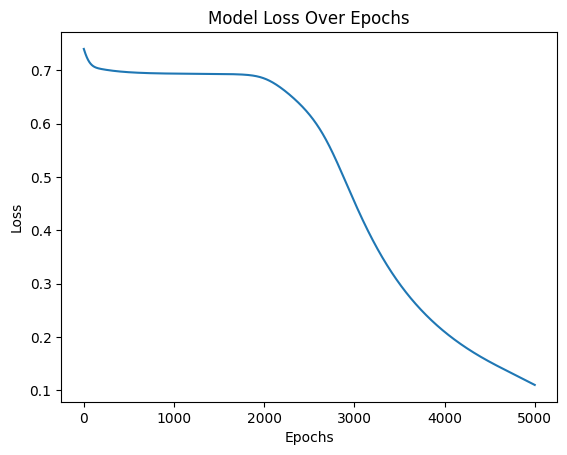

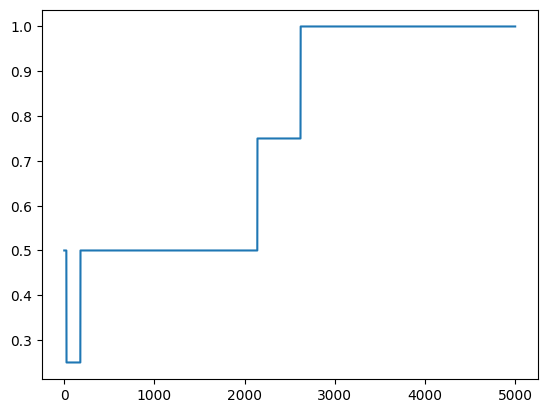

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Boolean dataset for XOR function
X=np.array([[0,0], [0,1], [1,0], [1,1]])
y=np.array([0, 1, 1, 0])

# Train the model and capture the history
history = model.fit(X, y, epochs=5000, verbose=1)

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.show()

In [32]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.11582474],
       [0.93647903],
       [0.8573926 ],
       [0.09317379]], dtype=float32)